# Option Pricing in Mathematical Finance

## Black-Scholes model
A standard model used in option pricing is that the logarithm of the stock price follows a Brownian motion. Hence, if St is the stock price at time t, we assume that log(St/S0) is normally distributed with mean μt and variance σ^2 t, where σ is the volatility, μ = r − σ^2/2, and r is the continuously-compounded riskless interest rate.
The celebrated Black-Scholes formula gives the price of a call option (exercised only at expiry). The price of the option is
\begin{equation}
BS:=S\Phi\Big(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\Big)-c\exp(-rt)\Phi\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big)
\end{equation}

In [1]:
import numpy as np

In [2]:
def a(i):
    r=[-1.26551223,1.00002368,0.37409196,0.09678418,-0.18628806,0.27886807,-1.13520398,1.48851587,-0.82215223,0.17087277]
    return r[i]

In [3]:
def phi(x):
    #approximation of the standard normal cdf
    if x==0:
        return 0.5
    elif x>0:
        t=1/(1+x/np.sqrt(8))
        return 1-t/2*np.exp(-x**2/2+sum(a(i)*t**i for i in range(10)))
    else:
        return 1-phi(-x)
def BlackScholes(s,c,t,r,sig,call=True):
    dp=(np.log(s/c)+(r+sig**2/2)*t)/sig/np.sqrt(t)
    dm=(np.log(s/c)+(r-sig**2/2)*t)/sig/np.sqrt(t)
    return s*phi(dp)-c*np.exp(-r*t)*phi(dm)

### Question 1
Write a program:

In [4]:
import pandas as pd

In [11]:
df1 = pd.DataFrame({'Stock_Price':[52,100,107]})
df2 = pd.DataFrame({'Time':[2,3]})  
df=df1.merge(df2, how='cross')
df['Black_Scholes_call']=df.apply(lambda x: BlackScholes(s=x[0],c=40,t=x[1],r=0.035,sig=0.5),axis=1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23676\82909112.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Black_Scholes_call']=df.apply(lambda x: BlackScholes(s=x[0],c=40,t=x[1],r=0.035,sig=0.5),axis=1)


In [12]:
df

,Stock_Price,Time,Black_Scholes_call
0,52,2,20.958411
1,52,3,23.945610
2,100,2,64.236717
3,100,3,66.844170
4,107,2,70.983029
5,107,3,73.498857


### Question 2
Effect of different parameters
 - Since c is the strike price and we are dealing with a call option, i.e. at the time of expiry, we have the right to buy at price c, the higher c is the less valuable our option should be. Veriafible by noting that the partial derivative of B wrt c is:
 \begin{equation}
 \frac{\partial BS}{\partial c}=-\frac{S}{c\sigma \sqrt{t}}p\Big(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\Big)-\exp(-rt)\Phi\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big) +\frac{\exp(-rt)}{\sigma \sqrt{t}}p\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big)
 \end{equation}
 where $p$ is the pdf of the standard normal distribution, however:
 \begin{align}
 p\Big(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\Big)&=p\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big)\exp\Big(-\frac{\log(S/c)+rt}{\sigma\sqrt{t}}\sigma\sqrt{t}\Big) \\
 &=p\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big)\exp(-rt)\frac{c}{S}
 \end{align}
 So we get the nice result:
  \begin{equation}
 \frac{\partial BS}{\partial c}=-\exp(-rt)\Phi\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big) < 0
 \end{equation}
 - S is the stock price at time of consideration, in the event t is very small, intuitively the option should be worth approximately max(S-c,0) since we are either not exercising the contract or buying at c to sell at S. This fact is directly observable by taking the limit as t goes to zero in the Black-Scholes Formula. Thus in the limit of t being very, this function should be increasing in S. In general we expect hence that the price is increasing given any path Bt due to this reasoning. Again we can check the partial:
 \begin{equation}
 \frac{\partial BS}{\partial S}=\frac{1}{\sigma \sqrt{t}}p\Big(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\Big)+\Phi\Big(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\Big) -\frac{c\exp(-rt)}{S\sigma \sqrt{t}}p\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big)
 \end{equation}
 Using the above relation again we get:
  \begin{equation}
 \frac{\partial BS}{\partial S}=\Phi\Big(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\Big) > 0
 \end{equation}
 - $\sigma$ is the volatility. In the limit when it approaches 0 we have that log(St/S0) is almost deterministic and equal to $rt$. In other word we can with very strong confidence guess that we will have value $\max(S\exp(rt)-c,0)$. Another way to see this is to yet again take the limit in the formula, where the deciding factor in the $\Phi$ is the sign of $\log(S/c)+rt=\log(\frac{S}{c}\exp(rt))$. Note that in this case we get the price to be $\max(S-c\exp(-rt),0)$, this is due to the fact that a value $V$ at current time will grow to $\exp(rt)V$. Additionally, according to the formula, in the limit as it tends to infinity the option price approaches S. Logically, this is because we can never exceed S, as its always better to have the stock than have the call option assuming they are equally priced. In general we expect the value to increase with volatility since the potential upsides are unlimited but downsides are capped at it being worthless, thus the more volatile the stock the larger spread meaning the heavier tails it has, meaning the more likely the extreme events are. Comparing two extreme events, if A is more extreme than B, than A will always yield more or equal profit to B in case we have a call option. Analytically this is derivable as well:
 \begin{equation}
 \frac{\partial BS}{\partial \sigma^{-1}}=S\Big(\frac{\log(S/c)+rt}{\sqrt{t}}-\frac{\sigma^2\sqrt{t}}{2} \Big)p\Big(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\Big)-c\exp(-rt)\Big(\frac{S\log(S/c)+rt}{\sqrt{t}}+\frac{\sigma^2\sqrt{t}}{2} \Big)p\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big)
 \end{equation}
 Again, using the relations derived for $S$ gives:
  \begin{equation}
 \frac{\partial BS}{\partial \sigma^{-1}}=-S\sigma^2\sqrt{t} p\Big(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\Big) < 0
 \end{equation}
 - $r$ is the continuously-compounded riskless interest rate.
  \begin{align}
 \frac{\partial BS}{\partial r}&=\frac{S\sqrt{t}}{\sigma}p\Big(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\Big)-\frac{c\exp(-rt)\sqrt{t}}{\sigma}p\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big) 
 +ct\exp(-rt)\Phi\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big) 
\\
 &=ct\exp(-rt)\Phi\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big) \\
 &>0
 \end{align}
 Analatically the larger $r$, the larger returns because it is positively correlated to the drift $\mu$. Intuitively possessing a call option in addition to an amount that will grow to be $c$ under the risk-free rate $r$ at time of expiration will always yield us at minimum the stock at time T (we can choose not to exercise so in fact the worth of this portfolio has to be more than the one where one buys the stock for $S$ initially). However as discussed previously the pricing of the call option can not exceed $S$, thus yielding the inequality:
 \begin{align}
  S \geq O & \geq S - c\exp(-rt) 
 \end{align}
 where $O$ is the value of the call option according to any model, not necessarily BS. Another way to frame it is when interests rates are high you would rather have the stock later and money now, thus putting more value of the call option. Concretely you would rather pay a smaller amount for the call option and let the money you have now grow to a larger amount which would cover both the premium and the stock price at expiration. The converse can be seen to hold for put options, where you would rather sell your stock now than later.

- $t$ is the time to expiration. Intuitively you could use the same reasoning as for $r$ to derive its behavior, but fundamentally the reason is that over longer time durations the stock is more likely to move up (recall for geometric brownian with drift $\mu$ we have $\mathbb{E}(X_{T})=\mathbb{E}(X_{0})\exp(-\int_0^t\mu_s ds)$). Also:

 \begin{align}
 \frac{\partial BS}{\partial t}&=S\Big(\frac{(r+\sigma^2/2)}{2\sigma\sqrt{t}} -\frac{\log(S/c)}{2\sigma t\sqrt{t}}\Big)p\Big(\frac{\log(S/c)+(r+\sigma^2/2)}{\sigma\sqrt{t}}\Big)-c\exp(-rt)\Big(\frac{(r-\sigma^2/2)}{2\sigma \sqrt{t}} -\frac{\log(S/c)}{2\sigma t\sqrt{t}}\Big)p\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big) 
 +rc\exp(-rt)\Phi\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big) 
\\
 &=\frac{c\exp(-rt)\sigma}{2\sqrt{t}}p\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big)+rc\exp(-rt)\Phi\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big) \\
 &=c\exp(-rt)p\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big)+rc\exp(-rt)\Phi\Big(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\Big) \\
 &>0
 \end{align}
 To verify we can draw some plots:

In [7]:
test=np.linspace(0.01,10,100)
func=np.vectorize(lambda x: BlackScholes(s=50,c=40,t=x,r=0.035,sig=0.5))

Text(0, 0.5, 'Call Price')

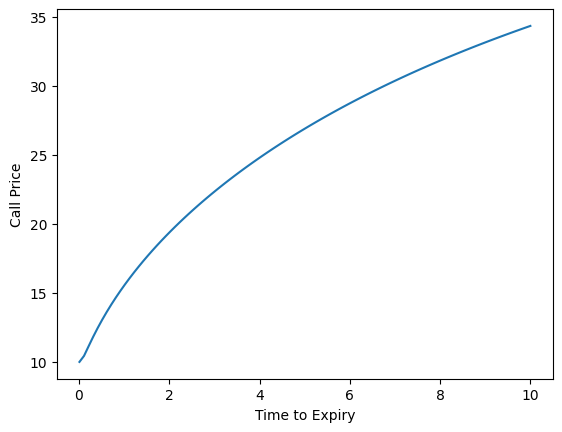

In [8]:
import matplotlib.pyplot as plt
plt.plot(test,func(test))
plt.xlabel('Time to Expiry')
plt.ylabel('Call Price')

## Bernoulli Approximation
Now implementing a Bernoulli approximation where we divide $[0,t]$ into $n$ subintervals with one time representative $t \frac{i}{n}$ each. We assume the increment in the logarithm of the price is g or −g with probability p or 1 − p respectively, where g and p are chosen so that the increment has mean $\mu t/n$ and variance $\sigma^2t/n$. Note we model the logarithms are bernoulli instead of the stock itself to avoid issues with negative values at the boundaries. From this it follows that:
\begin{equation}
g^2=\mu^2\frac{t^2}{n^2}+\sigma^2\frac{t}{n}
\end{equation}
and:
\begin{equation}
p=\frac{1}{2}\big(\frac{\mu t}{gn}+1\big)
\end{equation}
Note then that the stock price at time $t\frac{i}{n}$ has to be equal to:
\begin{equation}
S\exp(g(2j-i))
\end{equation}
where $j$ is a random integer from 0 to i. The implementation of the approximation used will follow the following form:
\begin{equation}
V_{i,j} =(pV_{i+1,j+1}+(1−p)V_{i+1,j})\exp(−rt/n)
\end{equation}
for $i=n-1,...,0$ indexing time and $j=0,...,i$ indexing the stock price at time $i$ according to the above. This relation assumes that we have a risk neutral measure (which is true for the base model) but the approximations we use do not quite give us this result as one can easily verify that the expected return is not the risk free rate (even though it is in the full SDE):
\begin{equation}
\mathbb{E}(S_{i+1}/S_{i} \mid S_{i})=p\exp(g)+(1-p)\exp(-g)
\end{equation}
In a risk neutral world this would be equal to $\exp(r\frac{t}{n})$, which we can solve for:
\begin{equation}
p\exp(g)+(1-p)\exp(-g)=\exp\left(r\frac{t}{n}\right)
\end{equation}
Plugging in $g$ and $p$ gives:
\begin{equation}
\frac{1}{2}\left(\frac{\mu t}{gn}+1\right)\exp(g)-\frac{1}{2}\left(\frac{\mu t}{gn}-1\right)\exp(-g)=\exp\left(r\frac{t}{n}\right)
\end{equation}
which of course is not always equal for any given $\mu=r-\frac{\sigma^2}{2}$. The good news is that asymptotically it will be, but this means that our valuations have a tendency to be a little high or a little low consistently. We can check by performing appropriate Taylor expansions:
\begin{align}
p&=\frac{1}{2}+\frac{\mu t}{2gn}  \\
\exp(f)&=\sum_{i=0}^{\infty}\frac{f^i}{i!} \\
\implies \frac{1}{2}\left(\frac{\mu t}{gn}+1\right)\exp(g)-\frac{1}{2}\left(\frac{\mu t}{gn}-1\right)\exp(-g) &=\sum_{k=0}^{\infty}\frac{g^{2k}}{(2k)!}+\frac{\mu t}{n}\sum_{k=0}^{\infty}\frac{g^{2k}}{(2k+1)!} \\
&=\sum_{k=0}^{\infty}\frac{\left(\mu^2\frac{t^2}{n}+\sigma^2t\right)^{k}}{n^{k}(2k)!}+\frac{\mu t}{n}\sum_{k=0}^{\infty}\frac{\left(\mu^2\frac{t^2}{n}+\sigma^2t\right)^{k}}{n^{k}(2k+1)!}
\end{align}
Putting it all in gives:
\begin{align}
\exp\left(r\frac{t}{n}\right)&=1+\frac{rt}{n}+\frac{r^2 t^2}{2n^2} +o\left(\frac{1}{n^2}\right)\\
\frac{1}{2}\left(\frac{\mu t}{gn}+1\right)\exp(g)-\frac{1}{2}\left(\frac{\mu t}{gn}-1\right)\exp(-g)&=1+\frac{\left(\mu+\frac{\sigma^2}{2}\right)t}{n}+\frac{\mu^2t^{2}}{2n^{2}}+\frac{\left(t^2\sigma^4+4\mu\sigma^2\right)t^2}{24n^2}+o\left(\frac{1}{n^2}\right)
\end{align}
which shows the local error is about $O(n^{-2})$, yielding a global error of $O(n^{-1})$ when it comes to stock price, with the Bernoulli model overestimating or underestimating the Stock price in the risk neutral world. Whether it is larger or smaller depends on:
\begin{align}
\frac{\mu^2t^{2}}{2n^{2}}+\frac{\left(t^2\sigma^4+4\mu\sigma^2\right)t^2}{24n^2}-\frac{r^2t^2}{2n^2}=\frac{t^2\sigma^2\left(\sigma^2-2r\right)}{6n^2}
\end{align}
This can be easily confirmed by plotting some values:




sign of discrete minus continuous should sign of 0.10999999999999999


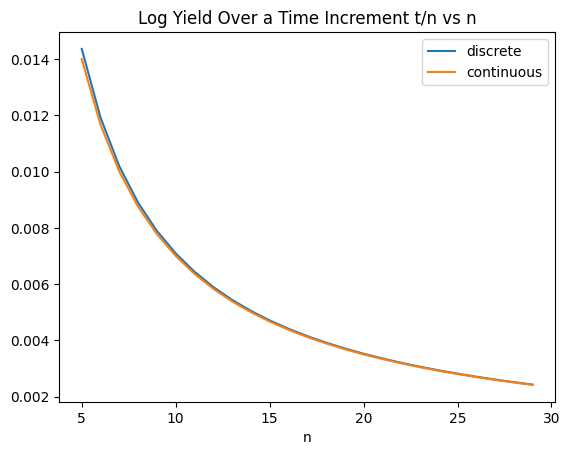

In [32]:
ns=np.arange(start=5,stop=30)
r=0.035
sig=0.5
t=2
mu=r-sig**2/2
gs=np.sqrt(mu**2*t**2/ns**2+sig**2*t/ns)
ps=0.5*(mu*t/ns/gs+1)
disc=ps*np.exp(gs)+(1-ps)*np.exp(-gs)
plt.plot(ns,np.log(disc),label='discrete')
plt.plot(ns,r*t/ns, label='continuous')
plt.legend()
plt.xlabel('n')
plt.title('Log Yield Over a Time Increment t/n vs n')
print(f'sign of discrete minus continuous should sign of {sig**2-4*r}')

sign of discrete minus continuous should sign of -1.35


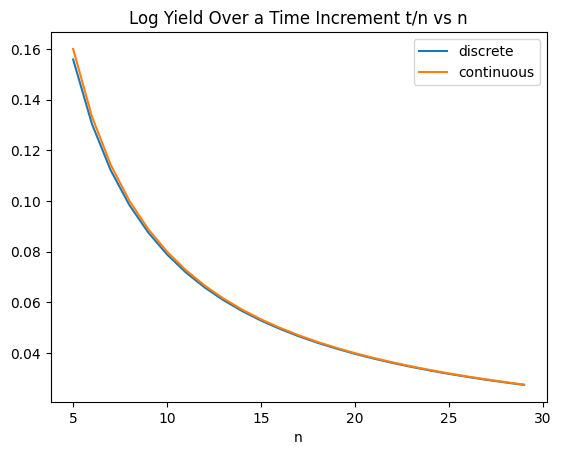

In [33]:
ns=np.arange(start=5,stop=30)
r=0.4
sig=0.5
t=2
mu=r-sig**2/2
gs=np.sqrt(mu**2*t**2/ns**2+sig**2*t/ns)
ps=0.5*(mu*t/ns/gs+1)
disc=ps*np.exp(gs)+(1-ps)*np.exp(-gs)
plt.plot(ns,np.log(disc),label='discrete')
plt.plot(ns,r*t/ns, label='continuous')
plt.legend()
plt.xlabel('n')
plt.title('Log Yield Over a Time Increment t/n vs n')
print(f'sign of discrete minus continuous should sign of {sig**2-4*r}')

Finally, we also of course have the natural boundary condition:
\begin{equation}
V_{n,j} =\Big( S\exp((2j-n)g) - c \Big)^{+}
\end{equation}

### Question 3 
The precise formulas for $g$ and $p$ are as follows:
\begin{align}
g=&\sqrt{\mu^2\frac{t^2}{n^2}+\sigma^2\frac{t}{n}} \\
p=&\frac{1}{2}\big(\frac{\mu t}{gn}+1\big)
\end{align}
The following code implements this approximation scheme:


In [17]:
def BerBS(s,c,t,r,sig,n,m=None,call=True):
    V=np.zeros((n+1,n+1), dtype=float)
    if not m:
        m=r-sig**2/2
    g=np.sqrt(t**2*m**2/n**2+sig**2*t/n)
    p=0.5*(m*t/g/n+1)
    for j in range(n+1):
        if call:
            V[n,j]=np.clip(s*np.exp(g*(2*j-n))-c,0,None)
        else:
            V[n,j]=np.clip(c-s*np.exp(g*(2*j-n)),0,None)
    for i in reversed(range(n)):
        for j in range(i+1):
            V[i,j]=np.exp(-r*t/n)*(p*V[i+1,j+1]+(1-p)*V[i+1,j])
    return V[0,0]

In [18]:
df['Bernoulli_EUcall']=df.apply(lambda x: BerBS(s=x['Stock_Price'],c=40,t=x['Time'],r=0.035,sig=0.5,n=27),axis=1)
df['Bernoulli_EUput']=df.apply(lambda x: BerBS(s=x['Stock_Price'],c=40,t=x['Time'],r=0.035,sig=0.5,n=27,call=False),axis=1)

In [19]:
df

,Stock_Price,Time,Black_Scholes_call,Bernoulli_EUcall,Bernoulli_EUput
0,52,2,20.958411,21.073248,6.351381
1,52,3,23.945610,24.059087,8.032456
2,100,2,64.236717,64.250816,1.512684
3,100,3,66.844170,66.933316,2.870121
4,107,2,70.983029,70.976846,1.236342
5,107,3,73.498857,73.636330,2.567802


### Question 5
This is pretty accurate, although the complexity of this algorithm grows as $O(n^2)$ as we need to fill half the $n\times n$ grid with valuations. Moreover note due to the tendency of the model to overestimate Stock Prices, the options are also overvalued as a result. 

### Question 6
Now considering an at the money case, $c=S=52,\sigma=0.5,r=0.035, t = 3$.

In [79]:
arg={'s':52,'c':52,'t':3,'r':0.035,'sig':0.5}
truevalue=BlackScholes(**arg)
res=[]
for i in range(5,100):
    arg['n']=i
    res.append(BerBS(**arg))

In [81]:
truevalue

19.257084241632406

<function matplotlib.pyplot.show(close=None, block=None)>

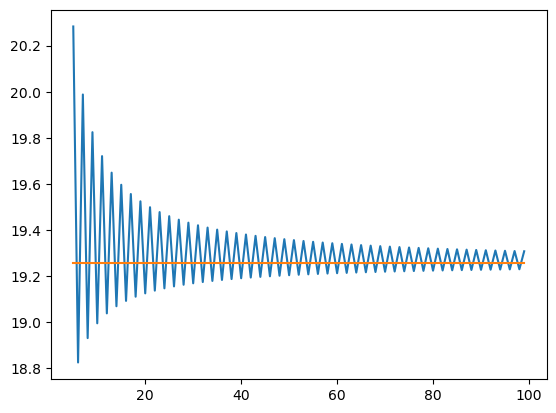

In [87]:
plt.plot(range(5,100),res)
plt.plot(range(5,100),truevalue*np.ones_like(res))
plt.show

Can see the approximation oscillates as we increase $n$. The reason thus occurs can be observed by noting the possible expiration payoffs are of the form:
\begin{equation}
S(\exp(g(2i-n))-1)^{+}
\end{equation}
The value $V_{0,0}$ is then going to be a weighted sum of these values. Noticeably if $n$ is odd then we have precisely that half the values are 0 whilst half are positive. Whereas if $n$ is even then more than half will be zero resulting in a lower value.

This behavior is most pronounced in at-the-money cases, and the skew upwards is retained due to the fact that the Stock prices tend to be overestimations as discussed above.

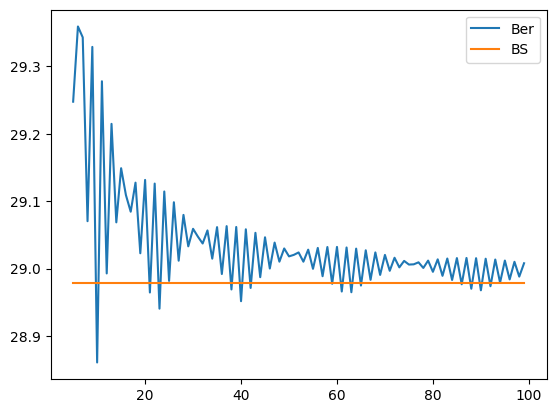

In [45]:
arg={'s':52,'c':30,'t':3,'r':0.035,'sig':0.5}
truevalue=BlackScholes(**arg)
res=[]
for i in range(5,100):
    arg['n']=i
    res.append(BerBS(**arg))
    
plt.plot(range(5,100),res,label='Ber')
plt.plot(range(5,100),truevalue*np.ones_like(res),label='BS')
plt.legend()

A way to see this more clearly is to observe the contribution from the first non zero term in the sum:
\begin{equation}
V_{0,0} =\exp(-rt)\sum_{j=0}^{n}{n \choose j} p^{j}(1-p)^{n-j}\left( S \exp((2j-n)g) - c \right)^{+}
\end{equation}]

In [38]:
import math

In [114]:
np.exp(3*0.035)

1.1107106103557052

Text(0.5, 0, 'n')

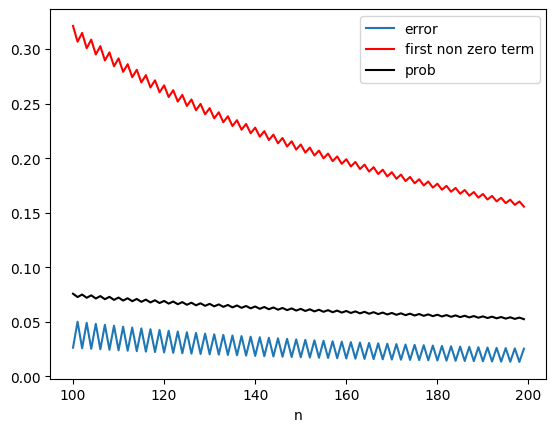

In [43]:
arg={'s':52,'c':52,'t':3,'r':0.035,'sig':0.5}
m=0.035-0.5**2/2
truevalue=BlackScholes(**arg)
res=[]
er=[]
pr=[]
for i in range(100,200):
    arg['n']=i
    res.append(BerBS(**arg))
    g=np.sqrt(arg['t']**2*m**2/arg['n']**2+arg['sig']**2*arg['t']/arg['n'])
    p=0.5*(m*3/g/i+1)
    if i%2==0:
        Num=i//2
        rem=0
    else:
        Num=i//2
        rem=1
    weight=p**(Num+rem)*(1-p)**Num*math.comb(i,Num)
    er.append(np.exp(-arg['r']*arg['t'])*np.clip(arg['s']*np.exp(g)-arg['s'],0,None)*weight)
    pr.append(weight)
plt.plot(range(100,200),np.abs(res-truevalue),label='error')
plt.plot(range(100,200),er, color='r',label='first non zero term')
plt.plot(range(100,200),pr, color='k',label='prob')
plt.legend()
plt.xlabel('n')

The red line is precisely the contribution from the j=n/2 term rounded up and the black is the weight given to that term in terms of the probability in the binomial sum. The blue is the error in the approximation. Notably the black line is almost twice the size of the blue

### Question 7

As mentioned above, the option price obtained from the Bernoulli can be succinctly stated as:
\begin{align}
V_{0,0} =&\exp(-rt)\sum_{j=0}^{n}{n \choose j} p^{j}(1-p)^{n-j}\Big( S\exp((2j-n)g) - c \Big)^{+} \\
=&\exp(-rt)\sum_{j=k}^{n}{n \choose j} p^{j}(1-p)^{n-j}\left( S\exp((2j-n)g) - c \right) \\
=&\exp(-rt)\sum_{j=k}^{n}{n \choose j} p^{j}(1-p)^{n-j}S\exp((2j-n)g) - c \exp(-rt)\sum_{j=k}^{n}{n \choose j} p^{j}(1-p)^{n-j} \\
=&S\exp(-rt)\sum_{j=k}^{n}{n \choose j} \left(pe^g\right)^{j}((1-p)e^{-g})^{n-j} - c \exp(-rt)\sum_{j=k}^{n}{n \choose j} p^{j}(1-p)^{n-j} \\
=&S\exp(-rt)D^nG_n(k,q)- c \exp(-rt)G_n(k,p)
\end{align}
where $k=\min \{j: S\exp((2j-n)g) - c\geq 0\}=\min \{j: j \geq \frac{1}{2g}\log\frac{c}{S}+\frac{n}{2}\}= \lfloor \frac{1}{2g}\log\frac{c}{S}+\frac{n}{2} \rfloor $, $D=pe^g+(1-p)e^{-g}$, $q=\frac{pe^g}{D}$ and $G_n(x,p)=\mathbb{P}(B_n\geq x), B_n\sim\text{Binomial}(n,p)$.

By the Berry-Esseen theorem, it follows that for any $n$ and $l\in(0,1)$:
\begin{equation}
\sup_{x} \left|G_n(x,l)-\Phi\left(-\frac{x}{\sqrt{nl(1-l)}}+\frac{nl}{\sqrt{nl(1-l)}}\right)\right| \leq \frac{l^2+(1-l)^2}{2\sqrt{nl(1-l)}}
\end{equation}

Notably for $x=k$, $G_n(k,l)=G_n(\frac{1}{2g}\log\frac{c}{S_0}+\frac{n}{2},l)$ by definition of $k$ and the fact that the Binomial cdf is constant between integers. Additionally, for $l=p$, observe:
\begin{align}
g^2np(1-p)=&\left(\frac{\mu t^2}{n^2}+\frac{\sigma^2 t}{n}\right)n\left(\frac{1}{2}+\frac{\mu t}{2gn}\right)\left(\frac{1}{2}-\frac{\mu t}{2gn}\right) \\
=&\left(\frac{\mu t^2}{n}+\sigma^2 t\right)\left(\frac{1}{4}-\frac{\mu^2 t^2}{4g^2n^2}\right) \\
=&\left(\frac{1}{4}\left(\frac{\mu t^2}{n}+\sigma^2 t\right)-\frac{\mu^2 t^2}{4n}\right) \\
=&\frac{\sigma^2 t}{4}
\end{align}
Thus it follows that:
\begin{align}
-\frac{\frac{1}{2g}\log\frac{c}{S}+\frac{n}{2}}{\sqrt{np(1-p)}}+\frac{np}{\sqrt{np(1-p)}}&=\frac{1}{\sigma\sqrt{t}}\left(\log\frac{S}{c}+\mu t\right)
\end{align}
and hence:
\begin{equation}
\left|G_n(k,p)-\Phi\left(\frac{1}{\sigma\sqrt{t}}\left(\log\frac{S}{c}+\mu t\right)\right)\right| \leq \frac{1}{2\sqrt{n}}+o\left(\frac{1}{\sqrt{n}}\right)
\end{equation}

For the other term, the error is a bit more complicated:
\begin{align}
g^2nq(1-q)&=\frac{g^2np(1-p)}{D^2}\\
&=\frac{\sigma^2t}{4D^2}
\end{align}
thus:
\begin{align}
\frac{1}{2\sqrt{g^2nq(1-q)}}&=\frac{D}{\sqrt{\sigma^2t}}\\
\end{align}

and hence:
\begin{align}
-\frac{\frac{1}{2g}\log\frac{c}{S}+\frac{n}{2}}{\sqrt{nq(1-q)}}+\frac{nq}{\sqrt{nq(1-q)}}&=\frac{D}{\sigma\sqrt{t}}\left(\log\frac{S}{c}+ng(2q-1)\right)
\end{align}

It is clear that $D\rightarrow 1$, but to get accurate error one needs to know the rate of convergence:
\begin{align}
D=&\left(\frac{1}{2}+\frac{\mu t}{2gn}\right)e^g+\left(\frac{1}{2}-\frac{\mu t}{2gn}\right)e^{-g} \\
=&\sum_{i=0}^{\infty}\frac{g^{2i}}{(2i)!}+\frac{\mu t}{n}\sum_{i=0}^{\infty}\frac{g^{2i}}{(2i+1)!} \\
=&1+o\left(\frac{1}{\sqrt{n}}\right)
\end{align}
which together with the fact that:
\begin{align}
Dng(2q-1)=&ng(2pe^g-D) \\
=&ng(pe^g-(1-p)e^{-g}) \\
=&ng\left(\frac{1}{2}+\frac{\mu t}{2gn}\right)e^g-ng\left(\frac{1}{2}-\frac{\mu t}{2gn}\right)e^{-g} \\
=&n\sum_{i=0}^{\infty}\frac{g^{2i+2}}{(2i+1)!}+\mu t\sum_{i=0}^{\infty}\frac{g^{2i}}{(2i)!} \\
=&n\sum_{i=0}^{\infty}\frac{\left(\mu^2\frac{t^2}{n^2}+\sigma^2\frac{t}{n}\right)^{i+1}}{(2i+1)!}+\mu t\sum_{i=0}^{\infty}\frac{\left((\mu^2\frac{t^2}{n^2}+\sigma^2\frac{t}{n})\right)^{i}}{(2i)!} \\
=&\sigma^2t+\mu t+o\left(\frac{1}{\sqrt{n}}\right)
\end{align}
gives:
\begin{align}
-\frac{\frac{1}{2g}\log\frac{c}{S}+\frac{n}{2}}{\sqrt{nq(1-q)}}+\frac{nq}{\sqrt{nq(1-q)}}&=\frac{1}{\sigma\sqrt{t}}\left(\log\frac{S}{c}+\sigma^2t+\mu t\right)+o\left(\frac{1}{\sqrt{n}}\right)
\end{align}

Since $\Phi$ is $C^{1}$ with derivative bounded by $\frac{1}{\sqrt{2\pi}}$, it follows that it is Lipschitz continuous with constant $<\frac{1}{\sqrt{2\pi}}$. Thus putting it all together:
\begin{equation}
\left|G_n(k,q)-\Phi\left(\frac{1}{\sigma\sqrt{t}}\left(\log\frac{S}{c}+\sigma^2t+\mu t\right)\right)\right| \leq \frac{1}{2\sqrt{n}}+o\left(\frac{1}{\sqrt{n}}\right)
\end{equation}

using similiar to above that $q\rightarrow \frac{1}{2}$. Finally:
\begin{align}
D^n=&\left(\sum_{i=0}^{\infty}\frac{g^{2i}}{(2i)!}+\frac{\mu t}{n}\sum_{i=0}^{\infty}\frac{g^{2i}}{(2i+1)!}\right)^n \\
&=\left(1+\frac{\mu t}{n}+\frac{g^2}{2}+O\left(\frac{1}{n^2}\right)\right)^n \\
&=\left(1+\frac{\mu t}{n}+\frac{\sigma^2 t}{2n}+O\left(\frac{1}{n^2}\right)\right)^n \\
&=\left(1+\frac{r t}{n}+O\left(\frac{1}{n^2}\right)\right)^n \\
&=\exp\left(n\log\left(1+\frac{r t}{n}+O\left(\frac{1}{n^2}\right)\right)\right) \\
&=\exp\left(r t+O\left(\frac{1}{n}\right)\right) \\
&=\exp(rt)+o\left(\frac{1}{\sqrt{n}}\right)
\end{align}
therefore leading to the bound:
\begin{align}
|V_{0,0}-V|&=\left|S\exp(-rt)D^nG_n(k,q)- c \exp(-rt)G_n(k,p)-S\Phi\left(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\right)+c\exp(-rt)\Phi\left(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\right)\right| \\
&\leq\left|S\exp(-rt)D^nG_n(k,q)-S\Phi\left(\frac{\log(S/c)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}\right)\right|+\left|c \exp(-rt)G_n(k,p)-c\exp(-rt)\Phi\left(\frac{\log(S/c)+(r-\sigma^2/2)t}{\sigma\sqrt{t}}\right)\right| \\
&\leq \frac{S+ce^{-rt}}{2\sqrt{n}}+o\left(\frac{1}{\sqrt{n}}\right)
\end{align}
Let $\epsilon(n):= \frac{S+ce^{-rt}}{2\sqrt{n}}$. Verify this relation through some numerical examples:

Text(0.5, 1.0, 'log error vs log n')

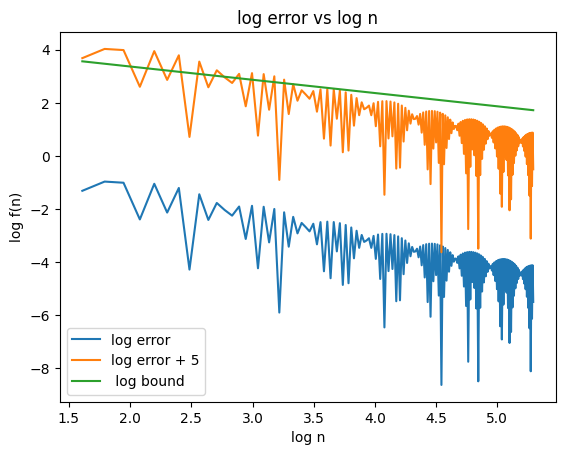

In [70]:
arg={'s':52,'c':30,'t':3,'r':0.035,'sig':0.5}
arg1={'s':30,'c':50,'t':10,'r':0.035,'sig':0.02}
truevalue=BlackScholes(**arg)
res=[]
N=200
for i in range(5,N):
    arg['n']=i
    res.append(BerBS(**arg))
    
plt.plot(np.log(range(5,N)),np.log(np.abs(res-truevalue)),label='log error')
plt.plot(np.log(range(5,N)),5+np.log(np.abs(res-truevalue)),label='log error + 5')
plt.plot(np.log(range(5,N)),np.log((arg['s']+arg['c']*np.exp(-arg['r']*arg['t']))/np.sqrt(np.arange(5,N))),label=' log bound')
plt.legend()
plt.xlabel('log n')
plt.ylabel('log f(n)')
plt.title('log error vs log n')

Plot shows that the order of the rate of convergence seems to match (maybe a bit faster), but the constant $S+ce^{-rt}$ is very loose, up to $e^5$ larger

In [81]:
np.exp(0.035*10)*30-45

np.float64(-2.427973542202281)

Text(0.5, 1.0, 'log error vs log n')

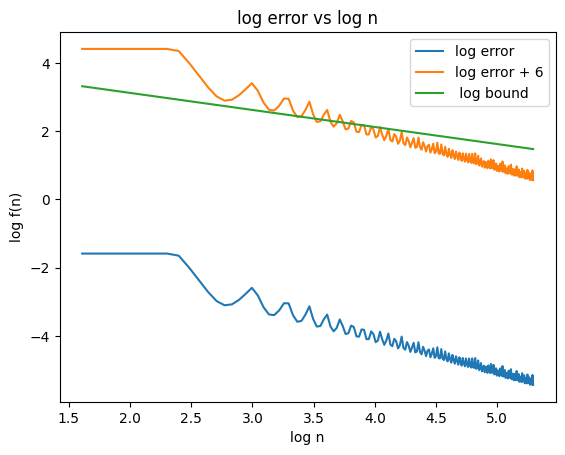

In [82]:
arg={'s':30,'c':45,'t':10,'r':0.035,'sig':0.02}
truevalue=BlackScholes(**arg)
res=[]
N=200
for i in range(5,N):
    arg['n']=i
    res.append(BerBS(**arg))
    
plt.plot(np.log(range(5,N)),np.log(np.abs(res-truevalue)),label='log error')
plt.plot(np.log(range(5,N)),6+np.log(np.abs(res-truevalue)),label='log error + 6')
plt.plot(np.log(range(5,N)),np.log((arg['s']+arg['c']*np.exp(-arg['r']*arg['t']))/np.sqrt(np.arange(5,N))),label=' log bound')
plt.legend()
plt.xlabel('log n')
plt.ylabel('log f(n)')
plt.title('log error vs log n')

Same plot but for an out of money case. The convergence does seem to be slightly faster. Not too surprising as the bound in Berry-Esseen holds for more general sums of independent random variables.

## American Put
We now incorporate the possibility to exercise early, in which case the boundary conditions remain same:
\begin{equation}
P_{n,j}=\left(c-Se^{(2j-n)g}\right)^{+} \quad \text{for} \quad j=0,\ldots,n
\end{equation}
However now at timestep $t\frac{i}{n}$, we need to factor in the fact that exercising it may be optimal:
\begin{equation}
P_{i,j}=\max\left(c-Se^{(2j-i)g},(pP_{i+1,j+1}+(1−p)P_{i+1,j})\exp(−rt/n)\right) \quad \text{for} \quad j=0,\ldots,i \quad \text{and} \quad i=n-1,\ldots 0
\end{equation}
Again this pricing is not entirely sound as this is not the risk neutral measure, but asymptotically it converges to it.
### Question 8

In [9]:
def BerAm(s,c,t,r,sig,n,m=None,call=False):
    V=np.zeros((n+1,n+1), dtype=float)
    if not m:
        m=r-sig**2/2
    g=np.sqrt(t**2*m**2/n**2+sig**2*t/n)
    p=0.5*(m*t/g/n+1)
    if not call:
        for j in range(n+1):
            V[n,j]=np.clip(c-s*np.exp(g*(2*j-n)),0,None)
        for i in reversed(range(n)):
            for j in range(i+1):
                V[i,j]=np.maximum(c-s*np.exp(g*(2*j-i)),np.exp(-r*t/n)*(p*V[i+1,j+1]+(1-p)*V[i+1,j]))
        return V[0,0]
    else:
        for j in range(n+1):
            V[n,j]=np.clip(s*np.exp(g*(2*j-n))-c,0,None)
        for i in reversed(range(n)):
            for j in range(i+1):
                V[i,j]=np.maximum(s*np.exp(g*(2*j-i))-c,np.exp(-r*t/n)*(p*V[i+1,j+1]+(1-p)*V[i+1,j]))
        return V[0,0]

In [20]:
df['Bernoulli_AMput']=df.apply(lambda x: BerAm(s=x['Stock_Price'],c=40,t=x['Time'],r=0.035,sig=0.5,n=27),axis=1)
df['Bernoulli_AMcall']=df.apply(lambda x: BerAm(s=x['Stock_Price'],c=40,t=x['Time'],r=0.035,sig=0.5,n=27,call=True),axis=1)

In [21]:
df

,Stock_Price,Time,Black_Scholes_call,Bernoulli_EUcall,Bernoulli_EUput,Bernoulli_AMput,Bernoulli_AMcall
0,52,2,20.958411,21.073248,6.351381,6.533142,21.073248
1,52,3,23.945610,24.059087,8.032456,8.375375,24.059087
2,100,2,64.236717,64.250816,1.512684,1.547885,64.250816
3,100,3,66.844170,66.933316,2.870121,2.946881,66.933316
4,107,2,70.983029,70.976846,1.236342,1.256902,70.976846
5,107,3,73.498857,73.636330,2.567802,2.634688,73.636330


Observe that the call prices are the same, but the American put is valued more than the European call. This logically follows from the fact that American options include the extra option of exercising early, so they must always be worth more than their European counterparts. The reason American call and European call options must be equal can be seen as follows:

1. American calls being exercised early at a time $\tau\in[0,t)$ implies $V(\tau,c,S_\tau)<(S_\tau-c)^{+}$ where $V(\tau,s,S_\tau)$ is the value of a European call at time $\tau$, strike $c$ and Stock price $S_\tau$. 
2. However:
\begin{align} 
V(\tau,s,S_\tau)&=e^{-r(t-\tau)}\mathbb{E}\left((S_t-c)^{+} \mid S_\tau\right) \\
&\geq e^{-r(t-\tau)}\mathbb{E}\left((S_t-c) \mid S_\tau\right) \\
&=S_\tau-ce^{-r(t-\tau)} \\
&\geq S_\tau-c
\end{align}
and thus we have a contradiction. 
3. In practical terms, this means that an arbitrage opportunity exists since this means you could simply buy call options and exercise at expiration for a profit on average.


In [42]:
np.polyfit(np.log(range(1,6)),np.log(diff),1)[1]

array([-1.68905457, -2.05919432])

Estimated order of convergence is 0.9257498506760169


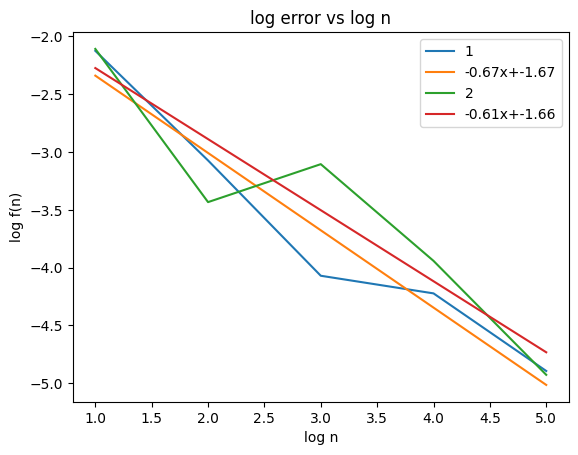

In [74]:
diff=[]
diff1=[]
N=200
d=2

arg={'s':52,'c':30,'t':3,'r':0.035,'sig':0.5,'n':10}
arg1={'s':30,'c':50,'t':10,'r':0.035,'sig':0.5,'n':5}

res=[BerAm(**arg)]
res1=[BerAm(**arg1)]

for i in range(2,7):
    arg['n']=10*d**i
    arg1['n']=5*d**i
    res.append(BerAm(**arg))
    res1.append(BerAm(**arg1))
    diff.append(np.abs(res[-1]-res[-2]))
    diff1.append(np.abs(res1[-1]-res1[-2]))
xs=range(1,6)
plt.plot(xs,np.log(diff),label='1')
p1=np.polyfit(xs,np.log(diff),1)
p2=np.polyfit(xs,np.log(diff1),1)
plt.plot(xs,np.polyval(p1,xs),label=f'{p1[0]:.2f}x+{p1[1]:.2f}')
plt.plot(xs,np.log(diff1),label='2')
plt.plot(xs,np.polyval(p2,xs),label=f'{p2[0]:.2f}x+{p2[1]:.2f}')
plt.legend()
plt.xlabel('log n')
plt.ylabel('log f(n)')
plt.title('log error vs log n')
print(f'Estimated order of convergence is {-(p1[0]+p2[0])/2/np.log(d)}')

## Extrapolation

Suppose that $f_n$ is the approximation to the option price, and we wish to find the limiting value of $f_n$ as $n \rightarrow \infty$ . One method of extrapolation assumes that $f_n$ may be approximated by a polynomial in $\frac{1}{n}$, say:
\begin{equation}
f_n=\sum_{j=0}^s g_jn^{-j}
\end{equation}
Then one way to approximate $g_0$ is as follows. Let $n_m =d^mn_0$ and calculate $f_n$ at $n = n_0,...,n_s$. Set
\begin{equation}
a_{m,0} = f_{n_m} \quad \text{for} \quad m=0,\ldots,s
\end{equation}
and recursively calculate:
\begin{equation}
a_{m,i} = a_{m,i-1} + \frac{a_{m,i- 1}-a_{m-1,i-1}}{d^i-1} \quad \text{for} \quad m=i,\ldots,s,\quad \text{and}\quad i=1,\ldots,s
\end{equation}
Then $a_{s,s}$ is taken as the approximation for $\lim_{n\rightarrow\infty}f_{n}$.

Why does this work? Let's examine $a_{m,1}$ for $m\geq1$:
\begin{align}
a_{m,1}&=\frac{d}{d-1}a_{m,0}-\frac{1}{d-1}a_{m-1,0} \\
&=\frac{d}{d-1}\sum_{j=0}^s g_jn_0^{-j}d^{-mj}-\frac{1}{d-1}\sum_{j=0}^s g_jn_0^{-j}d^{-(m-1)j} \\
&=g_0+\frac{1}{d-1}\left(\sum_{j=2}^s g_jn_0^{-j}d^{-mj+1}- g_jn_0^{-j}d^{-mj+j}\right)\\
&=g_0-\frac{1}{d-1}\left(\sum_{j=2}^s g_jn_0^{-j}d^{-mj}\left(d^{j}- d\right)\right) \\
&=g_0-\left(\sum_{j=2}^s g_jn_0^{-j}d^{-mj+1}\sum_{l=0}^{j-2}d^l\right) \\
&=g_0-d^{-2m+1}\left(\sum_{j=2}^s\sum_{l=0}^{j-2} g_jn_0^{-j}d^{-m(j-2)+l}\right) \\
&=g_0-d^{-2m+1}\left(\sum_{j=0}^{s-2}\sum_{l=0}^{j} g_{j+2}n_0^{-(j+2)}d^{-mj+l}\right) \\
&=g_0+d^{-2m+1}\left(\sum_{j=0}^{s-2}b_jp_j(d)d^{-mj}\right)
\end{align}


now continue inductively on $i$:
\begin{align}
a_{m,i-1}&=g_0-d^{-im+\frac{i(i-1)}{2}}\left(\sum_{j\geq0}b_jp_j(d)d^{-mj}\right) \\
\end{align}
where $p_j$ are rational functions such that $p_j(x)\sim C_j x^{j(i-1)}$ as $x\rightarrow \infty$ for some non-zero constant $C_j$ and $p_j(0)\neq0$,
\begin{align}
\implies a_{m,i}&=\frac{d^i}{d^i-1}a_{m,i-1}-\frac{1}{d^i-1}a_{m-1,i-1} \\
&=g_0+\frac{d^i}{d^i-1}d^{-im+\frac{i(i-1)}{2}}\left(\sum_{j\geq0}b_jp_j(d)d^{-mj}\right)-\frac{1}{d^i-1}d^{-im+i+\frac{i(i-1)}{2}}\left(\sum_{j\geq0}b_jp_j(d)d^{-mj+j}\right) \\
&=g_0+\frac{d^{-im+i+\frac{i(i-1)}{2}}}{d^i-1}\left(\sum_{j\geq0}b_jp_j(d)d^{-mj}\left(1-d^{j}\right)\right) \\
&=g_0-\frac{d^{-(i+1)m+\frac{i(i+1)}{2}}}{d^i-1}\left(\sum_{j\geq1}b_jp_j(d)d^{-m(j-1)}\left(d^{j}-1\right)\right) \\
&=g_0+d^{-(i+1)m+\frac{i(i-1)}{2}}\left(\sum_{j\geq0}c_{j}q_{j}(d)d^{-mj}\right) \\
\end{align}
where:
\begin{align}
q_j(x)&=\frac{p_{j+1}(x)\left(x^{j+1}-1\right)}{x^i-1}
\end{align}
is a rational function satisfying $q_j\sim C_{j+1}x^{(i-1)(j+1)+j+1-i)}$ as $x\rightarrow \infty$ and $q_j(0)=p_{j+1}(0)\neq0$. Also note this shows that $c_j=-b_{j+1}$, so suspect there may be oscillating behavior in errors. At $i=m=s$, this gives the error as of order roughly $d^{-\frac{s(s-3)}{2}}$. Note this methodology is does not actually necessitate that $f_n$ is a polynomial in $\frac{1}{n}$. Indeed, if one assumes instead that $f_n$ is a polynomial in $\frac{1}{n^\epsilon}$, then the same calculation works but with new $d'=d^{\epsilon}$ instead.



Moreoever, note that if calculating $f_n$ gives an error of roughly $O(\frac{1}{n^{\epsilon}})$, calculating at a large number say $n=n_0d^s$ would yield an error $O(d^{-s\epsilon})$. Running the extrapolation would yield an error of roughly $o(d^{-\frac{\epsilon s^2}{2}})$ based on values calculated up to $n=n_0d^s$. Hence we see that extrapolation should in theory be more accurate.

In [91]:
def extrapolate(s,c,t,r,sig,n0,ss,d,f=BerBS):
    a=np.zeros((ss,ss))
    for m in range(ss):
        a[m,0]=f(s,c,t,r,sig,n0*d**m)
    for i in range(1,ss):
        for m in range(i,ss):
            a[m,i]=(d**i*a[m,i-1]-a[m-1,i-1])/(d**i-1)
    return a[ss-1,ss-1]
    

In [118]:
arg

{'s': 4, 'c': 4, 't': 6, 'r': 0.4, 'sig': 0.3, 'n0': 1, 'd': 2, 'ss': 1}

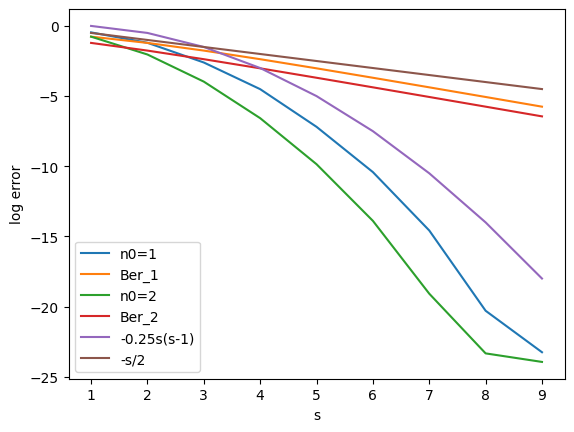

In [125]:
arg={'s':4,'c':4,'t':6,'r':0.4,'sig':0.3}
barg=arg.copy()
truevalue=BlackScholes(**arg)
arg['n0']=1
arg['d']=2
res=[]
res1=[]
bres=[]
bres1=[]
for i in range(1,10):
    arg['ss']=i
    barg['n']=arg['n0']*arg['d']**i
    res.append(extrapolate(**arg))
    bres.append(BerBS(**barg))
arg['n0']=2
for i in range(1,10):
    arg['ss']=i
    barg['n']=arg['n0']*arg['d']**i
    res1.append(extrapolate(**arg)) 
    bres1.append(BerBS(**barg))
plt.plot(np.arange(1,10),np.log(np.abs(res-truevalue)),label='n0=1')
plt.plot(np.arange(1,10),np.log(np.abs(bres-truevalue)),label='Ber_1')
plt.plot(np.arange(1,10),np.log(np.abs(res1-truevalue)),label='n0=2')
plt.plot(np.arange(1,10),np.log(np.abs(bres1-truevalue)),label='Ber_2')
plt.plot(np.arange(1,10),-np.arange(1,10)*(np.arange(1,10)-1)/4,label='-0.25s(s-1)')
plt.plot(np.arange(1,10),-np.arange(1,10)/2,label='-s/2')
plt.xlabel('s')
plt.ylabel('log error')
plt.legend()

Can see the errors roughly agree with what was analytically predicted. 

### Question 9
In theory it is possible for the error to depend on whether $n_0$ is odd or even, as recall that $f_n$ oscillates depending on whether $n$ is odd or even. If $n_0$ is even then $n_0d^{s}$ is even for all $s$ provided $d$ is not even, and likewise for $n_0$ odd.

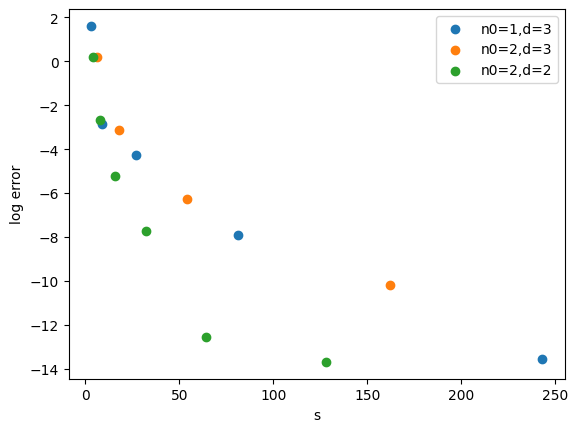

In [159]:
arg={'s':52,'c':52,'t':3,'r':0.035,'sig':0.5}
truevalue=BlackScholes(**arg)
arg['n0']=1
arg['d']=3
res=[]
res1=[]
res2=[]
for i in range(1,6):
    arg['ss']=i
    res.append(extrapolate(**arg))
arg['n0']=2
for i in range(1,5):
    arg['ss']=i
    res1.append(extrapolate(**arg)) 
arg['d']=2
for i in range(1,7):
    arg['ss']=i
    res2.append(extrapolate(**arg)) 
plt.scatter(3**np.arange(1,6),np.log(np.abs(res-truevalue)),label='n0=1,d=3')
plt.scatter(2*3**np.arange(1,5),np.log(np.abs(res1-truevalue)),label='n0=2,d=3')
plt.scatter(2*2**np.arange(1,7),np.log(np.abs(res2-truevalue)),label='n0=2,d=2')
plt.xlabel('s')
plt.ylabel('log error')
plt.legend()

In [166]:
def plotter(s=52,c=52,t=3,r=0.035,sig=0.5,d=3,n0=2,s_max=5):
    arg={'s':s,'c':c,'t':t,'r':r,'sig':sig}
    truevalue=BlackScholes(**arg)
    arg['n0']=n0
    arg['d']=d
    res=[]
    for i in range(1,s_max):
        arg['ss']=i
        res.append(extrapolate(**arg))
    plt.scatter(n0*d**np.arange(1,s_max),np.log(np.abs(res-truevalue)),label=f'n0={n0},d={d}')

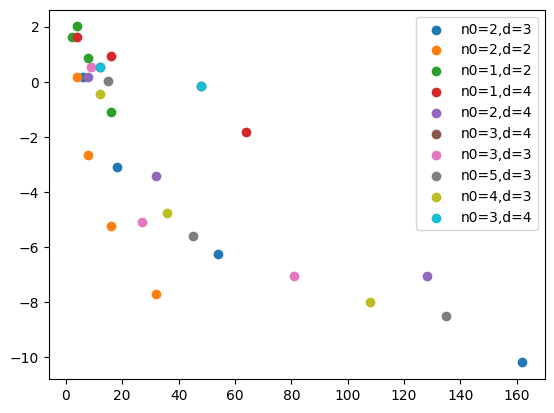

In [174]:
plotter()
plotter(d=2,n0=2)
plotter(d=2,n0=1)
plotter(d=4,n0=1,s_max=4)
plotter(d=4,n0=2,s_max=4)
plotter(d=4,n0=3,s_max=3)
plotter(d=3,n0=3,s_max=4)
plotter(d=3,n0=5,s_max=4)
plotter(d=3,n0=4,s_max=4)
plotter(d=4,n0=3,s_max=3)
plt.legend()

It does seem like even $n_0$ performs perhaps a bit better.